<a href="https://colab.research.google.com/github/matsunori39/Small-Data-Analysis-and-Machine-Learning/blob/main/Small_Data_Analysis_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ohmsha.co.jp/book/9784274227783/

# Chapter 2 Correlation and Principal Component Analysis

## 2.1 Data Preprocessing

### Data Standardization

In [1]:
import numpy as np

def autoscale(X):
  """
  Standardize data matrix

  Parameters
  ------------
  X: Data Matrix

  Return Value
  ------------
  Xscale: Data matrix after standardization
  meanX: mean vector
  stdX: standard deviation vector
  """

  meanX = np.mean(X, axis = 0)
  stdX = np.std(X, axis = 0, ddof = 1)
  Xscale = (X - meanX) / stdX
  return Xscale, meanX, stdX

def scaling(x, meanX, stdX):
  """
  Standardizes the sample from mean and standard deviation of the data matrix

  Parameters
  ------------
  x: Samples to be standardized
  meanX: mean vector
  stdX: standard deviation vector

  Return Value
  ------------
  xscale: Sample after standardization
  """

  xscale = (x - meanX) / stdX
  return xscale

def rescaling(xscale, meanX, stdX):
  """
  Restore standardized samples to original scale

  Parameters
  ------------
  xscale: Sample after standardization
  meanX: mean vector
  stdX: standard deviation vector

  Return Value
  ------------
  xscale: Sample of original scale
  """

  x = np.multiply(stdX, xscale) + meanX
  return x

### Standardize data

In [2]:
import numpy as np

# Define existing data and unknown samples with ndarray type
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

x = np.array([[10, 11, 12]])

# Standardize X
Xscale, meanX, stdX = autoscale(X)
print(Xscale)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


In [3]:
print(meanX)

[4. 5. 6.]


In [4]:
print(stdX)

[3. 3. 3.]


In [5]:
# Stdndardize unknown samples
xscale = scaling(x, meanX, stdX)
print(xscale)

[[2. 2. 2.]]


In [6]:
# Restore the standardized sample to its original scale
xrescale = rescaling(xscale, meanX, stdX)
print(xrescale)

[[10. 11. 12.]]


## 2.8 Derivation of the rth principal component

### PCA program with eigenvalue problem

In [7]:
import numpy as np

def pca(X):
  """
  Performs principal component analysis with eigenvalues

  Parameter
  ------------
  X: Data Matrix

  Return Values
  ------------
  P: Loading Matrix
  t: Principal Component Score Matrix  
  """

  # Computes the covariance matrix
  V = np.cov(X.T)
  # Solve the eigenvalue problem for the covariance matrix
  _, P = np.linalg.eig(V)

  # Calculate principal component scores
  t = X @ P
  return P, t

## 2.9 Examples of PCA values

In [8]:
import numpy as np

data = [[2, 2], [1, -1], [-1, 1], [-2, -2]]
x = np.array(data)
P, T = pca(x)

print(P)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 2.12 PCA and Singular Value Decomposition

### PCA using SVD

In [9]:
import numpy as np

def pca_svd(X):
  """
  Perform principal component analysis using SVD

  Parameter
  ---------
  X: Data Matrix

  Return Values
  ---------
  P: Loading Matrix
  t: Principal Component Score Matrix
  """

  # Decompose a matrix into singular values
  _, _, P = np.linalg.svd(X)

  # Calculate principal component scores
  t = X @ P.T
  return P, t

In [10]:
P, t = pca_svd(np.array(data))
print(P)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


# Chapter 3 Regression Analysis and Least Squares Method

## 3.2 Least Squares Method

In [11]:
import numpy as np

def least_squares(X, y):
  """
  Calculate regression coefficients using the least squares method

  Parameters
  ----------
  X: input data
  y: output data

  Return Value
  ----------
  beta: regression coefficient
  """

  # Vectorize y
  y = y.reshape(-1, 1)

  # normal equation
  beta = np.linalg.inv(X.T @ X) @ X.T @ y
  return beta

def ls_est(x, beta):
  """
  Predicts output using a linear regression model

  Parameters
  ----------
  x: unknown sample
  beta: regression coefficient

  Return Value
  ----------
  y_hat: Predicted value
  """

  y_hat = beta.T @ x
  return y_hat

### Numerical example of the least-squares method

In [12]:
import numpy as np

# Define data
X = np.array([[0.01, 0.50, -0.12],
              [0.97, -0.63, 0.02],
              [0.41, 1.15, -1.17],
              [-1.38, -1.02, 1.27]])

y = np.array([[0.25], [0.08], [1.03], [-1.37]])
x = np.array([1, 0.7, -0.2])

# Find the regression coefficient
beta = least_squares(X, y)
print(beta)

[[ 0.36347065]
 [ 0.41624871]
 [-0.34677593]]


In [13]:
# Predicts output from unknown samples
y_hat = ls_est(x, beta)
print(y_hat)

[0.72419993]


## 3.7 Multicollinearity issues

In [14]:
A = np.array([[2.01,   1 ],
              [  4 , 2.01]])
B = np.array([[1.99,   1 ],
              [  4 , 2.02]])

In [15]:
np.linalg.inv(A)

array([[ 50.12468828, -24.93765586],
       [-99.75062344,  50.12468828]])

In [16]:
np.linalg.inv(B)

array([[ 102.02020202,  -50.50505051],
       [-202.02020202,  100.50505051]])

In [17]:
C = np.array([[ 2 , 1 ],
              [ 4 , 2 ]])

In [18]:
np.linalg.cond(A)

625.4397976337879

In [19]:
np.linalg.cond(B)

1264.670926452252

In [20]:
np.linalg.cond(C)

2.517588727560788e+16

### For data without multicolinearity

In [21]:
import numpy as np

# Define data
X1 = np.array([[0.01, 0.50, -0.12],
               [0.97, -0.63, 0.02],
               [0.41, 1.15, -1.17],
               [-1.38, -1.02, 1.27]])

X2 = np.array([[-0.01, 0.52, -0.12],
               [0.96, -0.64, 0.03],
               [0.43, 1.14, -1.17],
               [-1.38, -1.01, 1.27]])

In [22]:
np.linalg.cond(X1.T @ X1)

135.7529385871794

In [23]:
np.linalg.cond(X2.T @ X2)

133.3934657598505

In [24]:
y = np.array([[0.25], [0.08], [1.03], [-1.37]])

# Calculate the regression coefficients for each of X1 and X2
beta1 = least_squares(X1, y)
print(beta1)

[[ 0.36347065]
 [ 0.41624871]
 [-0.34677593]]


In [25]:
beta2 = least_squares(X2, y)
print(beta2)

[[ 0.37270979]
 [ 0.41379869]
 [-0.34252764]]


### For multicolinear data

In [26]:
import numpy as np

# Define data (※ 0.25 * column1 - 0.8 * column2 = column3)
X1 = np.array([[-1.12, -0.51, 0.69],
               [-0.43, -1.12, 1.02],
               [0.37, 1.10, -0.98],
               [1.19, 0.53, -0.73]])

X2 = np.array([[-1.12, -0.51, 0.70],
               [-0.43, -1.12, 1.01],
               [0.36, 1.10, -0.98],
               [1.20, 0.53, -0.73]])

In [27]:
np.linalg.cond(X1.T @ X1)

235456.75658377822

In [28]:
np.linalg.cond(X2.T @ X2)

470649.9730137264

In [29]:
y = np.array([0.4, 1.17, -1.14, -0.42])

# Calculate the regression coefficients for each of X1 and X2
beta1 = least_squares(X1, y)
print(beta1)

[[0.54496962]
 [0.24094799]
 [1.64044474]]


In [30]:
beta2 = least_squares(X2, y)
print(beta2)

[[-0.42794288]
 [-2.86298696]
 [-2.2029719 ]]


## 3.10 Principal Component Regression (PCR)

In [31]:
import numpy as np

def pcr(X, y, R):
  """
  Calculate regression coefficients using PCR

  Parameters
  ----------
  X: Input Data
  y: Output Data
  R: Number of Principal Components

  Return Values
  ----------
  beta: Regression Coefficient
  """

  # Vectorize y
  y = y.reshape(-1, 1)

  # (Number of conditions before PCA)
  print(f"Number of conditions before PCA", np.linalg.cond(X.T @ X))

  # Principal Component Analysis
  P, T = pca(X)

  # Extract the principal component score matrices up to the Rth
  T = T[:,:R]

  # (Number of conditions after PCA)
  print(f"Number of conditions after PCA", np.linalg.cond(T.T @ T))

  # Find the regression coefficient by the least squares method
  beta_R = least_squares(T, y)
  beta = P[:,:R] @ beta_R
  return beta

### If the number of principal components is 2

In [32]:
import numpy as np

# Define data (※ 0.25 * column1 - 0.8 * column2 = column3)
X1 = np.array([[-1.12, -0.51, 0.69],
               [-0.43, -1.12, 1.02],
               [0.37, 1.10, -0.98],
               [1.19, 0.53, -0.73]])

X2 = np.array([[-1.12, -0.51, 0.70],
               [-0.43, -1.12, 1.01],
               [0.36, 1.10, -0.98],
               [1.20, 0.53, -0.73]])

In [33]:
y = np.array([0.4, 1.17, -1.14, -0.42]) 

In [34]:
# Set the number of principal components to 2
R = 2

beta1 = pcr(X1, y, R)

Number of conditions before PCA 235456.75658377822
Number of conditions after PCA 8.080825169090927


In [35]:
print(beta1)

[[ 0.25849154]
 [-0.68874152]
 [ 0.49387146]]


In [36]:
beta2 = pcr(X2, y, R)

Number of conditions before PCA 470649.9730137264
Number of conditions after PCA 7.975485263932513


In [37]:
print(beta2)

[[ 0.25929082]
 [-0.69212429]
 [ 0.49149105]]


### If the number of principal components is 1

In [38]:
# Set the number of principal components to 1
R = 1

beta1 = pcr(X1, y, R)

Number of conditions before PCA 235456.75658377822
Number of conditions after PCA 1.0


In [39]:
print(beta1)

[[-0.30313539]
 [-0.32858522]
 [ 0.34217102]]


In [40]:
beta2 = pcr(X2, y, R)

Number of conditions before PCA 470649.9730137264
Number of conditions after PCA 1.0


In [41]:
print(beta2)

[[-0.30335458]
 [-0.32755389]
 [ 0.34127419]]


## 3.11 Ridge regression

In [42]:
import numpy as np

def ridge(X, y, mu=0.1):
  """
  Calculate regression coefficients using ridge regression

  Parameters
  ----------
  X: Input Data
  y: Output Data
  mu: Parameter (default: 0.1)

  Return Values
  ----------
  beta_ridge: Regression Coefficient
  """
  # Vectorize y
  y = y.reshape(-1, 1)

  # Find the regression coeeficients for the Ridge regression
  I = np.eye(X.shape[1])
  # (Number of conditions before Ridge)
  print(f"Number of conditions before Ridge", np.linalg.cond(X.T @ X))
  # (Number of conditions after Ridge)
  print(f"Number of conditions after Ridge", np.linalg.cond(X.T @ X + mu * I))
  beta_ridge = np.linalg.inv(X.T @ X + mu * I) @ X.T @ y
  return beta_ridge

### Examples of Ridge regression

In [43]:
# Set the parameter to 0.1
mu = 0.1
beta1 = ridge(X1, y, mu)

Number of conditions before Ridge 235456.75658377822
Number of conditions after Ridge 81.12782634914616


In [44]:
print(beta1)

[[ 0.21088992]
 [-0.65139114]
 [ 0.47615414]]


In [45]:
beta2 = ridge(X2, y, mu)

Number of conditions before Ridge 470649.9730137264
Number of conditions after Ridge 81.11600505494289


In [46]:
print(beta2)

[[ 0.21198147]
 [-0.65545325]
 [ 0.47322964]]


In [47]:
# Set the parameter to 1
mu = 1
beta1 = ridge(X1, y, mu)

Number of conditions before Ridge 235456.75658377822
Number of conditions after Ridge 9.015237530107033


In [48]:
print(beta1)

[[ 0.01017256]
 [-0.47145393]
 [ 0.3798    ]]


In [49]:
beta2 = ridge(X2, y, mu)

Number of conditions before Ridge 470649.9730137264
Number of conditions after Ridge 9.012828087473903


In [50]:
print(beta2)

[[ 0.01227368]
 [-0.47396013]
 [ 0.37864896]]


## 3.15 Conversion to multiple regression model

### PLS1 by NIPALS

In [51]:
import numpy as np

def nipals_pls1(X, y, R):
  """
  Calculate regression coefficients using the NIPALS algorithm (PLS1)

  Parameters
  ----------
  X: Input Data
  y: Output Data
  R: Number of latent variables

  Return Values
  ----------
  beta: Regression Coefficient
  W, P, D: Parameters of the PLS1 model
  T: Latent Variable
  """

  # Vectorize y
  y = y.reshape(-1, 1)

  # Create variables to store parameters
  W = np.zeros((X.shape[1], R))
  P = np.zeros((X.shape[1], R))
  D = np.zeros((R, 1))
  T = np.zeros((X.shape[0], R))

  # Calculate NIPALS
  for r in range(R):
    # Find weights
    w = (X.T @ y) / np.linalg.norm(X.T @ y)
    # Calculate latent variables
    t = X @ w
    # Find the loading vector
    p = (X.T @ t) / (t.T @ t)
    # Find the regression coefficient
    d = (t.T @ y) / (t.T @ t)
    # Deflate
    X = X - t.reshape(-1, 1) @ p.T
    y = y - t @ d
    # Stores parameters
    W[:,r] = w.T
    P[:,r] = p.T
    D[r] = d.T
    T[:,r] = t.T

  # Calculate regression coeffieients
  beta = W @ np.linalg.inv(P.T @ W) @ D
  return beta, W, P, D, T

### Numerical example of PLS1

In [52]:
# When the latent variable is 2
R = 2
beta1, W1, P1, D1, T1 = nipals_pls1(X1, y, R)
print(beta1)

[[ 0.25850307]
 [-0.68870411]
 [ 0.4939176 ]]


In [53]:
beta2, W2, P2, D2, T2 = nipals_pls1(X2, y, R)
print(beta2)

[[ 0.25927822]
 [-0.69216413]
 [ 0.49144161]]


In [54]:
# When the latent variable is 1
R = 1
beta1, W1, P1, D1, T1 = nipals_pls1(X1, y, R)
print(beta1)

[[-0.23825147]
 [-0.38052552]
 [ 0.36808306]]


In [55]:
beta2, W2, P2, D2, T2 = nipals_pls1(X2, y, R)
print(beta2)

[[-0.23758087]
 [-0.38091899]
 [ 0.36748303]]


## 3.16 If there is more than one output variable

### PLS2 by NIPALS

In [56]:
# Function of PLS2 main unit

def nipals_pls2(X, Y, R, epsilon=0.01):
  """
  Calculate regression coefficients using the NIPALS algorithm (PLS2)

  Parameters
  ----------
  X: Input Data
  y: Output Data
  R: Number of latent variables
  epsilon: (default: 0.01)

  Return Values
  ----------
  beta: Regression Coefficient
  W, P, Q: Parameters of the PLS2 model
  T: Latent Variable
  """

  # Vectorize Y
  Y = Y.reshape(-1, 1)

  # Create variables to store parameters
  W = np.zeros((X.shape[1], R))
  P = np.zeros((X.shape[1], R))
  Q = np.zeros((Y.shape[1], R))
  T = np.zeros((X.shape[0], R))

  for r in range(R):
    # Find w, c, t
    w, c, t = calc_parameter(X, Y, epsilon)
    # Find the loading vector
    p = (X.T @ t) / (t.T @ t)
    # Find the regression coefficient
    q = (Y.T @ t) / (t.T @ t)
    # Deflate
    X = X - np.outer(t, p)
    Y = Y - np.outer(t, q)
    # Stores parameters
    W[:,r] = w.T
    P[:,r] = p.T
    Q[:,r] = q.T
    T[:,r] = t.T

  # Calculate regression coeffieients
  beta = W @ np.linalg.inv(P.T @ W) @ Q.T
  return beta, W, P, Q, T

def calc_parameter(X, Y, epsilon):
  u = Y[:,0]
  while True:
    # Update weight vectors
    w = X.T @ u / np.linalg.nrom(X.T @ u)
    # Update the latent variable t
    t = X @ w
    # Update the weight vector c
    c = Y.T @ t / np.linalg.norm(Y.T @ t)
    # Update the latent variable u
    u_new = Y @ C
    # Convergence judgment is made
    if np.linalg.norm(u_new - u) < epsilon: break
    u = u_new
  return w, c, t

## 3.17 PLS and Eigenvalue Problem/Singular Value Decomposition

### PLS by NIPALS

In [57]:
def simpls(X, Y, R):
  """
  Calculate regression coefficients using the NIPALS algorithm

  Parameters
  ----------
  X: Input Data
  y: Output Data
  R: Number of latent variables

  Return Values
  ----------
  beta: Regression Coefficient
  W, P, Q: Parameters of the PLS1 model
  T, U: Latent Variables
  cont: contribution ratio
  """

  # Vectorize Y
  Y = Y.reshape(-1, 1)

  # Create variables to store parameters
  W = np.zeros((X.shape[1], R))
  P = np.zeros((X.shape[1], R))
  Q = np.zeros((Y.shape[1], R))
  T = np.zeros((X.shape[0], R))
  U = np.zeros((Y.shape[0], R))
  ssq = np.zeros([R,2])
  ssqX = np.sum(X**2)
  ssqY = np.sum(Y**2)

  for r in range(R):
    # Singular value decomposition
    u, s, v = np.linalg.svd(Y.T @ X)
    # Find the right singular value vector corresponding to the maximum singular value
    w = v[0,:].T
    # Find the latent variable t
    t = X @ w
    # Find the loading vector
    p = (X.T @ t) / (t.T @ t)
    # Find the regression coefficient q
    q = (Y.T @ t) / (t.T @ t)
    # Deflate
    X = X - np.outer(t, p)
    Y = Y - np.outer(t, q)
    # Stores parameters
    W[:,r] = w.T
    P[:,r] = p.T
    Q[:,r] = q.T
    T[:,r] = t.T
    U[:,r] = u.T

  # Calculate regression coeffieients
  beta = W @ np.linalg.inv(P.T @ W) @ Q.T

  # Calculate the contribution ratio
  cont = np.zeros([R,2])
  cont[0,:] = 1 - ssq[0,:]
  for r in range(1,R):
    cont[r,:] = ssq[r-1,:] - ssq[r,:]

  return beta, W, P, Q, T, U, cont

### Numerical example of SIMPLS

In [58]:
# When the latent variable is 2
R = 2
beta1, W1, P1, Q1, T1, _, _ = simpls(X1, y, R)
print(beta1)

[[ 0.25850307]
 [-0.68870411]
 [ 0.4939176 ]]


In [59]:
beta2, W2, P2, Q2, T2, _, _ = simpls(X2, y, R)
print(beta2)

[[ 0.25927822]
 [-0.69216413]
 [ 0.49144161]]


In [60]:
# When the latent variable is 1
R = 1
beta1, W1, P1, Q1, T1, _, _ = simpls(X1, y, R)
print(beta1)

[[-0.23825147]
 [-0.38052552]
 [ 0.36808306]]


In [61]:
beta2, W2, P2, Q2, T2, _, _ = simpls(X2, y, R)
print(beta2)

[[-0.23758087]
 [-0.38091899]
 [ 0.36748303]]


## 3.18 Hyperparameter adjustment

### cross-validatation

In [62]:
import numpy as np

def pls_cv(X, Y, maxLV, K=10):
  """
  Cross-validation to find the optimal number of latent variables in the PLS

  Parameters
  ----------
  X: Input Data
  Y: Output Data
  maxLV: Maximum latent variable to search for
  K: Number of data division (default: 10)

  Returns
  ----------
  optR: Optimal number of latent variables
  press: PRESS
  """

  n, m = X.shape
  n, l = Y.shape
  R = np.arange(1, maxLV + 1)
  all_index = [i for i in range(n)]
  # Number of samples of split data
  validation_size = n // K
  # Variable to store cross-validation results
  result = np.matrix(np.zeros((K, len(R))))

  # Shuffle the array
  Z = np.hstack((X, Y))
  rng = np.random.default_rng()
  rng.shuffle(Z, axis = 0)
  X = Z[:,0:m]
  Y = Z[:,m:m+1]

  # Calculate PRESS with cross-validation for each latent variable
  for i, r in enumerate(R):
    for k in range(K):
      # K-separate the data for cross-validation and,
      # Select training and validation data
      if k != K - 1:
        val_index = all_index[k * validation_size : (k+1) * validation_size -1]
      else:
        val_index = all_index[k * validation_size:]
      train_index = [i for i in all_index if not i in val_index]
      X_train = X[train_index,:]
      X_val = X[val_index,:]
      Y_train = Y[train_index,:]
      Y_val = Y[val_index,:]

      # Standardize each data
      X_train, meanX, stdX = autoscale(X_train)
      Y_train, meanY, stdY = autoscale(Y_train)
      X_val = scaling(X_val, meanX, stdX)

      # Calculate regression coefficients usin training data
      beta, _, _, _, _, _, _ = simpls(X_train, Y_train, r)

      # Compute the predicted value of Y_hat for X_val from the calculated regression coefficients, and
      # Return to the original scale
      Y_hat = X_val @ beta
      J = Y_hat.shape[0]
      for j in range(J):
        Y_hat[j,:] = rescaling(Y_hat[j,:], meanY, stdY)
      
      # Calculate and save PRESS
      press_val = PRESS(Y_val, Y_hat)
      result[k, i] = press_val
      press = np.sum(result, axis=0)
    
  # Search for latent variables when PRESS reaches a minimum
  optR = R[np.argmin(press)]
  return optR, press

def PRESS(y, y_hat):

  press_val = np.diag((y - y_hat).T @ (y - y_hat))
  return press_val

## 3.19 Regression Model Performance Evaluation

### RMSE and correlation coefficient

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def pred_eval(y, y_hat, plotflg=False):
  """
  Calculate RMSE and correlation coefficient

  Parameters
  ----------
  y: true value
  y_hat: predicted value
  pltflg: Plot On/Off (default: False)

  Return Values
  ----------
  rmse: RMSE
  r: Correlation Coefficient 
  """

  rmse = np.linalg.norm(y - y_hat)/np.sqrt(len(y))
  r = np.corrcoef(y, y_hat)[0,1]

  if plotflg:

    # Plot a scatter plot
    fig, ax = plt.subplots()
    plt.xlabel('Reference')
    plt.ylabel('Prediction')
    plt.scatter(y, y_hat)

    # Get a range of plots
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    plt.plot([xmin, xmax], [ymin, ymax], color="darkgreen", linestyle="dashed")
  
    # Correlation coefficients and RMSE are displayed during plotting
    r_text = f'r={r:.2f}'
    rmse_text = f'rmse={rmse:.2f}'

    posx = (xmax - xmin) * 0.1 + xmin
    posy_1 = (ymax - ymin) * 0.8 + ymin
    posy_2 = (ymax - ymin) * 0.75 + ymin
    ax.text(posx, posy_1, r_text)
    ax.text(posx, posy_2, rmse_text)

    plt.show()
  
  return rmse, r

## 3.20 Estimation of physical properties by spectral analysis

In [64]:
!wget https://eigenvector.com/wp-content/uploads/2019/06/CNGATEST.zip

--2022-07-04 03:49:25--  https://eigenvector.com/wp-content/uploads/2019/06/CNGATEST.zip
Resolving eigenvector.com (eigenvector.com)... 69.163.163.60, 2607:f298:6:a034::eaf:812c
Connecting to eigenvector.com (eigenvector.com)|69.163.163.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 735453 (718K) [application/zip]
Saving to: ‘CNGATEST.zip’

CNGATEST.zip        100%[===================>] 718.22K  2.08MB/s    in 0.3s    

2022-07-04 03:49:25 (2.08 MB/s) - ‘CNGATEST.zip’ saved [735453/735453]



In [65]:
!unzip CNGATEST.zip

Archive:  CNGATEST.zip
  inflating: CNGATEST.mat            


### Loading spectral data for diesel fuel

In [77]:
import scipy.io

# Loads MATLAB format file
CNGATEST_dict = scipy.io.loadmat('CNGATEST.mat')

# Data is stored as a dictonary type, so check the key
print(CNGATEST_dict.keys())

dict_keys(['__header__', '__version__', '__globals__', 'cn_sd_hl', 'cn_y_hl', 'cn_sd_ll_a', 'cn_sd_ll_b', 'cn_y_ll_a', 'cn_y_ll_b'])


### Prepare training and test data

In [78]:
import numpy as np

# Extracting an array from a dictionary type
cn_sd_hl = CNGATEST_dict['cn_sd_hl']
cn_sd_ll_a = CNGATEST_dict['cn_sd_ll_a']
cn_sd_ll_b = CNGATEST_dict['cn_sd_ll_b']
cn_y_hl = CNGATEST_dict['cn_y_hl']
cn_y_ll_a = CNGATEST_dict['cn_y_ll_a']
cn_y_ll_b = CNGATEST_dict['cn_y_ll_b']

# Prepare training and validation data
Xtrain = np.vstack([cn_sd_ll_a, cn_sd_hl])
Xval = cn_sd_ll_b

ytrain = np.vstack([cn_y_ll_a, cn_y_hl])
yval = cn_y_ll_b

# Check array size
print(Xtrain.shape)

(133, 401)


In [79]:
print(Xval.shape)

(112, 401)


### Confirmation of spectra

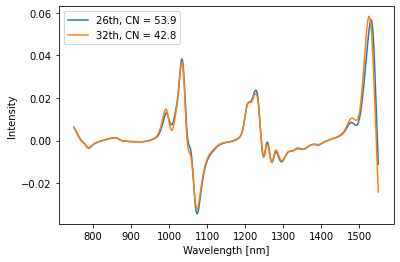

In [80]:
import matplotlib.pyplot as plt

# Prepare the values for the horizontal axis of the plot
wave = np.arange(750, 1551, 2)

fig, ax = plt.subplots(facecolor="w")
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity')
ax.plot(wave, Xtrain[26,:], label='26th, CN = 53.9')
ax.plot(wave, Xtrain[32,:], label='32th, CN = 42.8')
ax.legend()
plt.show()

### Learnign calibration curves with Ridge regression and PCR

Number of conditions before Ridge 2.7974206921691247e+19
Number of conditions after Ridge 23294.576835911


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


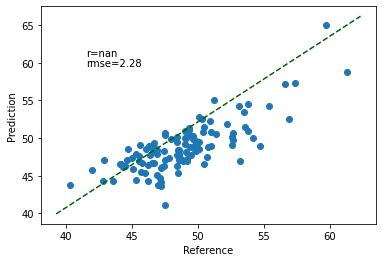

Number of conditions before PCA 2.7974206921691247e+19
Number of conditions after PCA 10.930888158547178


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


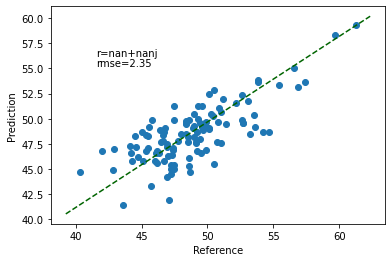

In [86]:
# Standardization of data
X_, meanX, stdX = autoscale(Xtrain)
y_, meany, stdy = autoscale(ytrain)
Xval_ = scaling(Xval, meanX, stdX)
yval_ = scaling(yval, meany, stdy)

# Ridge Regression
beta = ridge(X_, y_, mu=1)
y_hat_ = Xval_ @ beta
y_hat = rescaling(y_hat_, meany, stdy)
rmse, r = pred_eval(yval, y_hat, True)

# PCR
beta = pcr(X_, y_, R=5)
y_hat_ = Xval_ @ beta
y_hat = rescaling(y_hat_, meany, stdy)
rmse, r = pred_eval(yval, y_hat, plotflg=True)

### Learning calibrations in PLS

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


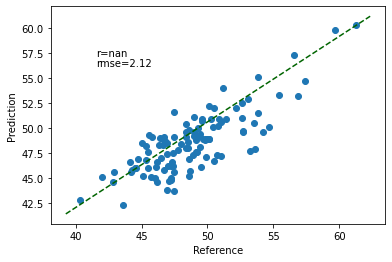

[nan, 2.122218718395657]


In [87]:
# PLS (R=20)
beta, _, _, _, _, _, _ = simpls(X_, y_, R=5)
y_hat_ = Xval_ @ beta
y_hat = rescaling(y_hat_, meany, stdy)
rmse, r = pred_eval(yval, y_hat, True)

print([r, rmse])

In [88]:
# Cross-validation
optLV, press = pls_cv(X_, y_, maxLV=30, K=10)

print(optLV)

6


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


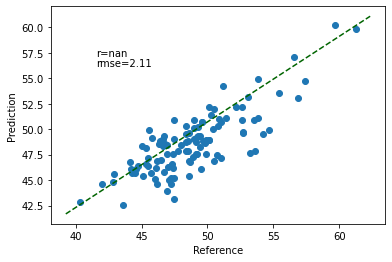

In [90]:
# Calibration study
beta, _, _, _, _, _, _ = simpls(X_, y_, optLV)
y_hat_ = Xval_ @ beta
y_hat = rescaling(y_hat_, meany, stdy)
rmse, r = pred_eval(yval, y_hat, True)